## Análise Descritiva do Banco de Dados (Pesquisa Nacional Domiciliar)

In [1]:
!pip install seaborn
!pip install plotly
# Carregar Bibliotecas
import pandas as pd # manipulação e análise de dados
import numpy as np # computação numérica / manipulação de arrays
import seaborn as sns # criação de gráficos estatísticos
import matplotlib.pyplot as plt # criar visualizações gráficas
import plotly.express as px # criar gráficos interativos


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Carregar a base de dados  Pesquisa Nacional por Amostra de Domicílios (PNAD)
pesquisa = pd.read_csv(r"C:\Users\brunn\OneDrive\Área de Trabalho\ESTATÍSTICA\Estatística curso_nordeste\Aula_04\Base_dados_pesquisa_nacional_amostra_domicílios.csv")

In [5]:
# Visualizar as cinco primeiras observações
pesquisa.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [6]:
# visualizar os nomes das colunas
pesquisa.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [7]:
# Renomear as colunas
pesquisa.rename(columns={'UF': 'estado', 'Sexo': 'sexo', 'Idade': 'idade', 'Cor':'cor', 'Anos de Estudo':'anos_estudo', 'Renda':'renda',
                         'Altura':'altura'}, inplace=True)

In [8]:
print(pesquisa.columns)

Index(['estado', 'sexo', 'idade', 'cor', 'anos_estudo', 'renda', 'altura'], dtype='object')


In [9]:
# Resumo informativo sobre o Dataframe, verificar 
pesquisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   estado       76840 non-null  int64  
 1   sexo         76840 non-null  int64  
 2   idade        76840 non-null  int64  
 3   cor          76840 non-null  int64  
 4   anos_estudo  76840 non-null  int64  
 5   renda        76840 non-null  int64  
 6   altura       76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [3]:
# Substituir os valors da coluna Cor - alterar o numero por nome
pesquisa['cor'].replace({0:'Indígena', 2:'Branco', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaracao'}, inplace=True)


KeyError: 'cor'

In [10]:
# Analisar a coluna COR 
pesquisa['cor']

0        8
1        2
2        8
3        2
4        8
        ..
76835    2
76836    4
76837    8
76838    8
76839    8
Name: cor, Length: 76840, dtype: int64

In [11]:
# Análise Descritivas da coluna COR. Por ser categórica, vamos analisar a frequência.
contagem_cor = pesquisa['cor'].value_counts()
print(contagem_cor)

cor
8    35925
2    31815
4     8391
0      357
6      352
Name: count, dtype: int64


C:\Users\brunn\AppData\Local\Temp\ipykernel_39864\3062231628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cor', data=pesquisa, palette='Set2')


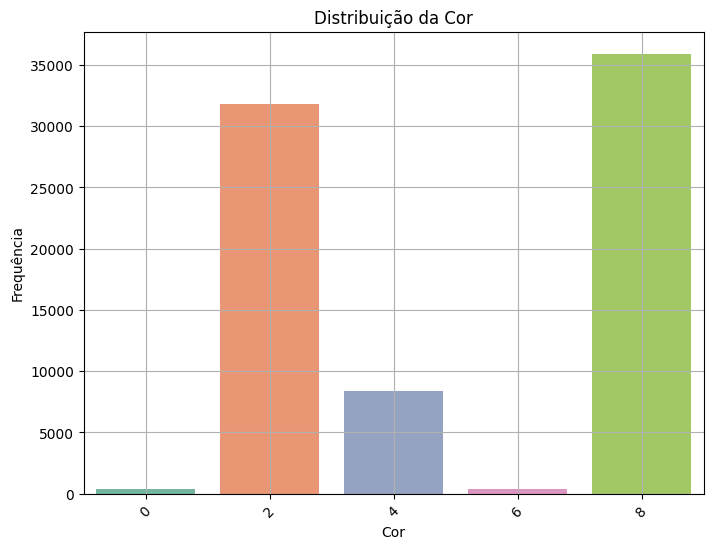

In [12]:
# Plotar o gráfico de barras para a coluna COR com seaborn
plt.figure(figsize=(8,6))
sns.countplot(x='cor', data=pesquisa, palette='Set2')
plt.title('Distribuição da Cor')
plt.xlabel('Cor')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [13]:
# Verificar a coluna Sexo
pesquisa['sexo']

0        0
1        1
2        1
3        0
4        1
        ..
76835    1
76836    0
76837    0
76838    0
76839    0
Name: sexo, Length: 76840, dtype: int64

In [14]:
# Renomear a coluna sexo
pesquisa['sexo'].map({0:'Masculino', 1:'Feminino'})

0        Masculino
1         Feminino
2         Feminino
3        Masculino
4         Feminino
           ...    
76835     Feminino
76836    Masculino
76837    Masculino
76838    Masculino
76839    Masculino
Name: sexo, Length: 76840, dtype: object

In [15]:
pesquisa

,estado,sexo,idade,cor,anos_estudo,renda,altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [16]:
pesquisa['sexo'].replace({0:'Masculino', 1:'Feminino'}, inplace=True)

In [17]:
pesquisa

,estado,sexo,idade,cor,anos_estudo,renda,altura
0,11,Masculino,23,8,12,800,1.603808
1,11,Feminino,23,2,12,1150,1.739790
2,11,Feminino,35,8,15,880,1.760444
3,11,Masculino,46,2,6,3500,1.783158
4,11,Feminino,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,Feminino,46,2,11,812,1.687030
76836,53,Masculino,30,4,7,1500,1.792934
76837,53,Masculino,32,8,12,1300,1.830587
76838,53,Masculino,57,8,4,1500,1.726344


In [18]:
# Análise Descritivas da coluna SEXO. Por ser categórica, vamos analisar a frequência.
contagem_sexo = pesquisa['sexo'].value_counts()
print(contagem_sexo)

sexo
Masculino    53250
Feminino     23590
Name: count, dtype: int64


C:\Users\brunn\AppData\Local\Temp\ipykernel_39864\4269138731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexo', data=pesquisa, palette='Set2')


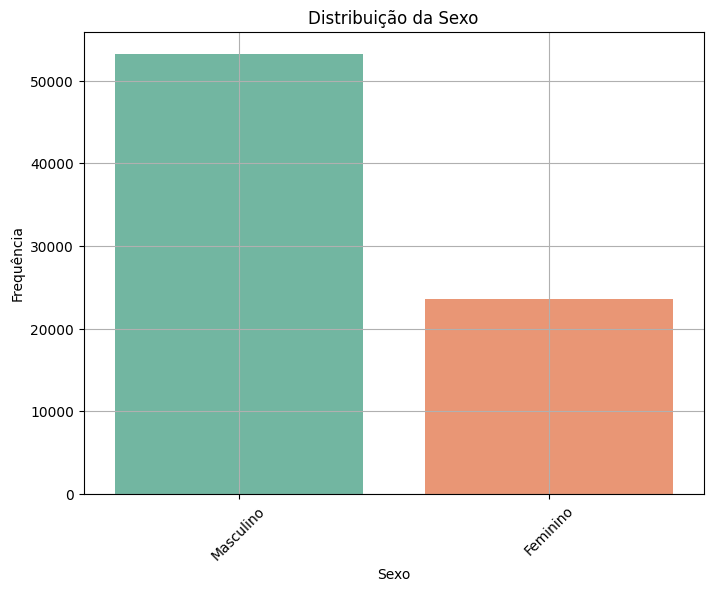

In [19]:
# # Plotar o gráfico de barras para a coluna SEXO com seaborn
plt.figure(figsize=(8,6))

sns.countplot(x='sexo', data=pesquisa, palette='Set2')
plt.title('Distribuição da Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [20]:
estado = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}
pesquisa['estado'].replace(estado, inplace=True)

C:\Users\brunn\AppData\Local\Temp\ipykernel_39864\2905654377.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pesquisa['estado'].replace(estado, inplace=True)


In [21]:
pesquisa

,estado,sexo,idade,cor,anos_estudo,renda,altura
0,Rondônia,Masculino,23,8,12,800,1.603808
1,Rondônia,Feminino,23,2,12,1150,1.739790
2,Rondônia,Feminino,35,8,15,880,1.760444
3,Rondônia,Masculino,46,2,6,3500,1.783158
4,Rondônia,Feminino,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,Distrito Federal,Feminino,46,2,11,812,1.687030
76836,Distrito Federal,Masculino,30,4,7,1500,1.792934
76837,Distrito Federal,Masculino,32,8,12,1300,1.830587
76838,Distrito Federal,Masculino,57,8,4,1500,1.726344


In [22]:
contagem_estado = pesquisa['estado'].value_counts()
print(contagem_estado)

estado
São Paulo              8544
Minas Gerais           7686
Rio Grande do Sul      6322
Bahia                  5717
Rio de Janeiro         5556
Pará                   4449
Paraná                 4356
Pernambuco             3820
Goiás                  3478
Ceará                  3359
Santa Catarina         2275
Amazonas               2206
Distrito Federal       2054
Mato Grosso            1800
Maranhão               1787
Rondônia               1537
Espírito Santo         1511
Mato Grosso do Sul     1440
Tocantins              1306
Sergipe                1287
Paraíba                1274
Piauí                  1211
Rio Grande do Norte     973
Acre                    937
Alagoas                 903
Roraima                 540
Amapá                   512
Name: count, dtype: int64


C:\Users\brunn\AppData\Local\Temp\ipykernel_39864\4156532705.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estado', data=pesquisa, palette='Set2')


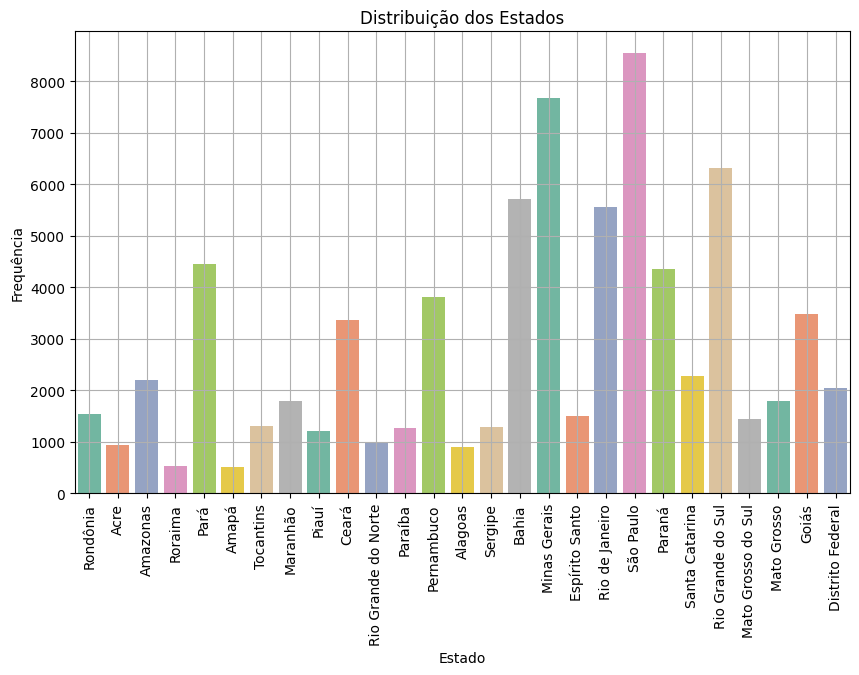

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando o gráfico de barras horizontal (com rotação dos rótulos)
plt.figure(figsize=(10,6))

sns.countplot(x='estado', data=pesquisa, palette='Set2')
plt.title('Distribuição dos Estados')
plt.xlabel('Estado')
plt.ylabel('Frequência')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para 90 graus (vertical)
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [24]:
anos_estudo = {
    1: '0',
    2: '1',
    3: '2',
    4: '3',
    5: '4',
    6: '5',
    7: '6',
    8: '7',
    9: '8',
    10: '9',
    11: '10',
    12: '11',
    13: '12',
    14: '13',
    15: '14',
    16: '15',
    17: '0'
    }

pesquisa['anos_estudo'].replace(anos_estudo,inplace=True)

C:\Users\brunn\AppData\Local\Temp\ipykernel_39864\821804562.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pesquisa['anos_estudo'].replace(anos_estudo,inplace=True)


In [25]:
pesquisa.head()

,estado,sexo,idade,cor,anos_estudo,renda,altura
0,Rondônia,Masculino,23,8,11,800,1.603808
1,Rondônia,Feminino,23,2,11,1150,1.739790
2,Rondônia,Feminino,35,8,14,880,1.760444
3,Rondônia,Masculino,46,2,5,3500,1.783158
4,Rondônia,Feminino,47,8,8,150,1.690631


In [ ]:
# 'estado', 'sexo', 'idade', 'cor', 'anos_estudo', 'renda', 'altura'], dtype='object')

### Análise Descritiva

In [26]:
# Distribuição de frequencia para as variáveis categóricas
print(pesquisa['estado'].value_counts())
print(pesquisa['sexo'].value_counts())
print(pesquisa['cor'].value_counts())

estado
São Paulo              8544
Minas Gerais           7686
Rio Grande do Sul      6322
Bahia                  5717
Rio de Janeiro         5556
Pará                   4449
Paraná                 4356
Pernambuco             3820
Goiás                  3478
Ceará                  3359
Santa Catarina         2275
Amazonas               2206
Distrito Federal       2054
Mato Grosso            1800
Maranhão               1787
Rondônia               1537
Espírito Santo         1511
Mato Grosso do Sul     1440
Tocantins              1306
Sergipe                1287
Paraíba                1274
Piauí                  1211
Rio Grande do Norte     973
Acre                    937
Alagoas                 903
Roraima                 540
Amapá                   512
Name: count, dtype: int64
sexo
Masculino    53250
Feminino     23590
Name: count, dtype: int64
cor
8    35925
2    31815
4     8391
0      357
6      352
Name: count, dtype: int64


In [27]:
# Análise Descritiva
print(pesquisa.describe())

              idade           cor          renda        altura
count  76840.000000  76840.000000   76840.000000  76840.000000
mean      44.071421      5.032613    2000.383199      1.699512
std       12.480583      2.857118    3323.387730      0.079717
min       13.000000      0.000000       0.000000      1.339245
25%       34.000000      2.000000     788.000000      1.645785
50%       43.000000      4.000000    1200.000000      1.699325
75%       53.000000      8.000000    2000.000000      1.753062
max       99.000000      8.000000  200000.000000      2.028497


In [28]:
# Correlação entre as variáveis numérica

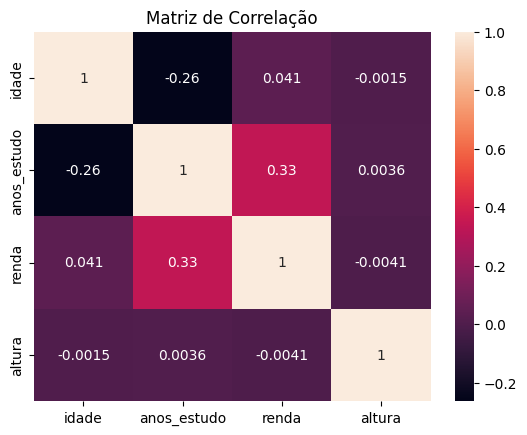

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlação entre variáveis numéricas
correlation_matrix = pesquisa[['idade', 'anos_estudo', 'renda', 'altura']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlação')
plt.show()


sexo
Feminino     1566.847393
Masculino    2192.441596
Name: renda, dtype: float64


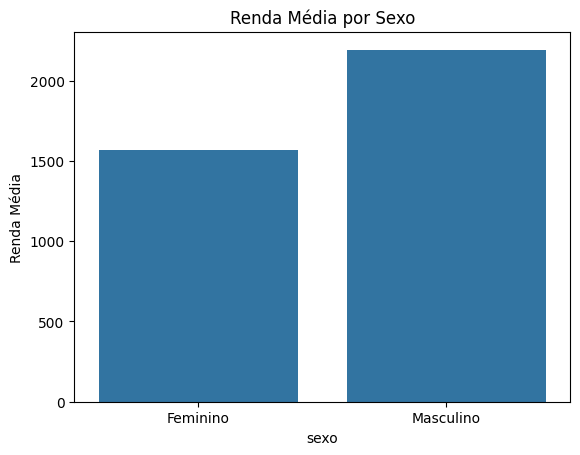

In [30]:
# Análise COmparativa
# Renda média por sexo
renda_sexo = pesquisa.groupby('sexo')['renda'].mean()
print(renda_sexo)

# Gráfico de barras
sns.barplot(x=renda_sexo.index, y=renda_sexo.values)
plt.title('Renda Média por Sexo')
plt.ylabel('Renda Média')
plt.show()
